In [1]:
'''

import pandas as pd
import psycopg2
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
    ('order_items.csv', 'order_items')
]

# If we direct call the dataset here then, that will going to take very large time. So, we are loading our csv dataset in SQL using python.

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='Aryan@29',
    database='ecommerce',
    port = 5432
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:\My Folder\DSUD\Project\Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INTEGER'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'"{col}" {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS "{table_name}" ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the PostgreSQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f'INSERT INTO "{table_name}" ({", ".join([f"\"{col}\"" for col in df.columns])}) VALUES ({", ".join([ "%s" ] * len(row))})'
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

'''

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\29kum\AppData\Local\Temp\ipykernel_1084\2528785603.py:1: SyntaxWarning: invalid escape sequence '\M'
  '''


'\n\nimport pandas as pd\nimport psycopg2\nimport os\n\n# List of CSV files and their corresponding table names\ncsv_files = [\n    (\'customers.csv\', \'customers\'),\n    (\'orders.csv\', \'orders\'),\n    (\'sellers.csv\', \'sellers\'),\n    (\'products.csv\', \'products\'),\n    (\'geolocation.csv\', \'geolocation\'),\n    (\'payments.csv\', \'payments\'),  # Added payments.csv for specific handling\n    (\'order_items.csv\', \'order_items\')\n]\n\n# If we direct call the dataset here then, that will going to take very large time. So, we are loading our csv dataset in SQL using python.\n\n# Connect to the PostgreSQL database\nconn = psycopg2.connect(\n    host=\'localhost\',\n    user=\'postgres\',\n    password=\'Aryan@29\',\n    database=\'ecommerce\',\n    port = 5432\n)\ncursor = conn.cursor()\n\n# Folder containing the CSV files\nfolder_path = \'D:\\My Folder\\DSUD\\Project\\Ecommerce\'\n\ndef get_sql_type(dtype):\n    if pd.api.types.is_integer_dtype(dtype):\n        return \

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

conn = psycopg2.connect(host = "localhost",
                        user = "postgres",
                        password = "Aryan@29",
                        database = "ecommerce",
                        port = 5432)

cur = conn.cursor()

# List all unique cities where customers are located.

In [3]:
# query = """ Select distinct(customer_city) from customers """
# cur.execute(query)

# data = cur.fetchall()

# data


try:
    query = """ Select distinct(customer_city) from customers """
    cur.execute(query)
    data = cur.fetchall()
    print(data)
except Exception as e:
    print(f"Error: {e}")
    conn.rollback()  # Rollback the transaction

df_data = pd.DataFrame(data)
df_data.head()


[('bom jardim de minas',), ('alto rio doce',), ('alvorada do gurgueia',), ('batatais',), ('capao da porteira',), ('icatu',), ('osorio',), ('populina',), ('novo mundo',), ('tururu',), ("alta floresta d'oeste",), ('cajamar',), ('presidente lucena',), ('santa maria do salto',), ('cacador',), ('araxa',), ('carnaubais',), ('lindolfo collor',), ('japira',), ('botelho',), ('tabapua',), ('joao camara',), ('barrolandia',), ('nepomuceno',), ('ibertioga',), ('frei lagonegro',), ('sao jose da barra',), ('pitangui',), ('jaragua do sul',), ('ervalia',), ('governador celso ramos',), ('santa ernestina',), ('quatro bocas',), ('grao mogol',), ('diamantina',), ('itaju',), ('tiradentes',), ('junqueiro',), ('macambira',), ('barauna',), ('ibirapua',), ('uniao do sul',), ('palma',), ('agrolandia',), ('bom jesus da serra',), ('surubim',), ('unai',), ('formosa do rio preto',), ('medianeira',), ('japoata',), ('emilianopolis',), ('lupionopolis',), ('ivai',), ('picui',), ('cabeceira grande',), ('narandiba',), ('v

,0
0,bom jardim de minas
1,alto rio doce
2,alvorada do gurgueia
3,batatais
4,capao da porteira


In [4]:
query = """SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'orders' AND column_name = 'order_purchase_timestamp';"""

cur.execute(query)
cur.fetchall()


[('order_purchase_timestamp', 'text')]

# Count the number of orders placed in 2017.

In [5]:

# query = """ Select count(order_id) from orders where EXTRACT(YEAR FROM order_purchase_timestamp) = 2017 """
query = """ SELECT COUNT(order_id)
FROM orders
WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2017; """

cur.execute(query)

# Fetch the result
data = cur.fetchall()
# data
print("Total order placed in 2017 is = ",data[0][0])


# Since `data` is a list of tuples, you need to extract the count value
# order_count = data[0][0]

# # Output the result
# print(order_count)


Total order placed in 2017 is =  45101


# Find the Total sales per category

In [6]:
query = """ Select products.product_category category, round(sum(payments.payment_value)::numeric,2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category
"""

cur.execute(query)

data = cur.fetchall()
data

[('Agro Industria e Comercio', Decimal('118730.61')),
 ('Art', Decimal('30992.93')),
 ('Arts and Crafts', Decimal('2326.17')),
 ('audio', Decimal('60324.62')),
 ('automotive', Decimal('852294.33')),
 ('babies', Decimal('539845.66')),
 ('Bags Accessories', Decimal('187151.29')),
 ('bed table bath', Decimal('1712553.67')),
 ('Blu Ray DVDs', Decimal('7935.28')),
 ('Casa Construcao', Decimal('136645.29')),
 ('cds music dvds', Decimal('1199.43')),
 ('Christmas articles', Decimal('18994.77')),
 ('cine photo', Decimal('9530.32')),
 ('CITTE AND UPHACK FURNITURE', Decimal('5998.54')),
 ('climatization', Decimal('91170.66')),
 ('computer accessories', Decimal('1585330.45')),
 ('CONSTRUCTION SECURITY TOOLS', Decimal('65691.03')),
 ('Construction Tools Construction', Decimal('241475.63')),
 ('Construction Tools Garden', Decimal('42394.41')),
 ('Construction Tools Illumination', Decimal('72712.48')),
 ('Construction Tools Tools', Decimal('21069.07')),
 ('Cool Stuff', Decimal('779698.00')),
 ('Drink

In [7]:
# Creating dataframe of the above data
df_data = pd.DataFrame(data, columns = ['Category', 'Sales'])
df_data

,Category,Sales
0,Agro Industria e Comercio,118730.61
1,Art,30992.93
2,Arts and Crafts,2326.17
3,audio,60324.62
4,automotive,852294.33
...,...,...
69,technical books,24915.44
70,telephony,486882.05
71,toys,619037.69
72,Watches present,1429216.68


In [8]:
# Calculate the percentage of orders that were paid in installments.
conn.rollback()
query = """ Select (sum(case when payment_installments >= 1 then 1
else 0 end)) / count(*) *100 from payments;
"""

cur.execute(query)

data = cur.fetchall()
data



[(0,)]

# Count number of customer in each state

In [9]:
query  = """select customer_state, count(customer_unique_id)
from customers group by customer_state ;"""

cur.execute(query)
data = cur.fetchall()
data

# Creating dataframe
df_data = pd.DataFrame(data, columns=['Customer_State','Customer_count'])
df_data

,Customer_State,Customer_count
0,RS,5466
1,SC,3637
2,DF,2140
3,MG,11635
4,RN,485
5,SP,41746
6,GO,2020
7,AM,148
8,PA,975
9,PB,536


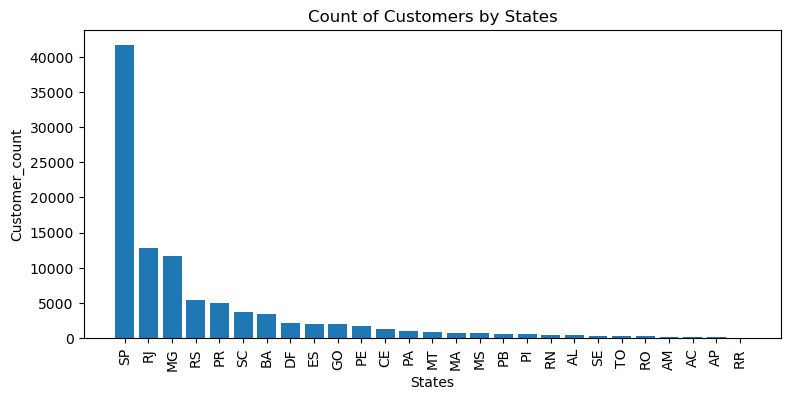

In [10]:
df_data = df_data.sort_values(by="Customer_count", ascending= False)  # Arrenging the datas in ascending order

plt.figure(figsize = (9,4)) # For changing the size of the graph.

plt.bar(df_data["Customer_State"], df_data["Customer_count"])
plt.xlabel("States")
plt.ylabel("Customer_count")
plt.title("Count of Customers by States")
plt.xticks(rotation = 90)   # Giving space in x-axis
plt.show()


# Intermediate Queries

Q1. Calculate the number of order per month in 2018.

In [11]:
try:
    query = """ Select TRIM(TO_CHAR(order_purchase_timestamp::timestamp, 'Month')) as order_month,
count(order_id)
from orders where EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2018
group by order_month ;
"""

    cur.execute(query)

    data = cur.fetchall()
    print(data)

except Exception as e :
    print("Error in the code:- ",e)
    conn.rollback()

[('April', 6939), ('August', 6512), ('February', 6728), ('January', 7269), ('July', 6292), ('June', 6167), ('March', 7211), ('May', 6873), ('October', 4), ('September', 16)]


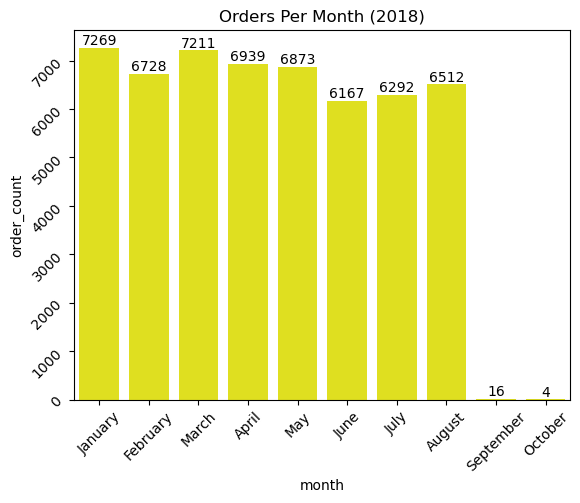

In [12]:
df = pd.DataFrame(data, columns=['month',"order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

# plt.bar(x = df['month'], height = df["order_count"], order = o)

ax = sns.barplot(data =df , x = df['month'], y = df["order_count"], order = o, color="yellow")

# Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
# ax = sns.barplot(data =df , x = df['month'], y = df["order_count"], order = o, hue=df['month'], legend = False, palette = "viridis")

# plt.xlabel('Month')
# plt.ylabel('Order Count')
plt.title('Orders Per Month (2018)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax.bar_label(ax.containers[0])  # For showing lebel above the bars.
plt.show()


# Find the average number of products per order , grouped by customer city.

In [13]:
try:
    query = """with count_per_order as (Select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
    from orders join order_items
    on orders.order_id = order_items.order_id
    group by orders.order_id, orders.customer_id)

    select customers.customer_city, round(avg(count_per_order.oc),2)
    from customers join count_per_order
    on customers.customer_id = count_per_order.customer_id
    group by customers.customer_city;

    """

    cur.execute(query)
    data = cur.fetchall()
    print(data)
    
except Exception as e:
    print("Error:- ", e)
    conn.rollback()

[('bom jardim de minas', Decimal('1.38')), ('alto rio doce', Decimal('1.00')), ('alvorada do gurgueia', Decimal('1.00')), ('batatais', Decimal('1.11')), ('capao da porteira', Decimal('1.00')), ('icatu', Decimal('1.00')), ('osorio', Decimal('1.17')), ('populina', Decimal('2.00')), ('novo mundo', Decimal('1.00')), ('tururu', Decimal('1.00')), ("alta floresta d'oeste", Decimal('1.00')), ('cajamar', Decimal('1.16')), ('presidente lucena', Decimal('1.00')), ('santa maria do salto', Decimal('1.00')), ('cacador', Decimal('1.05')), ('araxa', Decimal('1.20')), ('lindolfo collor', Decimal('1.00')), ('carnaubais', Decimal('1.00')), ('japira', Decimal('1.67')), ('botelho', Decimal('1.00')), ('tabapua', Decimal('1.08')), ('joao camara', Decimal('1.00')), ('barrolandia', Decimal('1.00')), ('nepomuceno', Decimal('1.11')), ('ibertioga', Decimal('1.00')), ('frei lagonegro', Decimal('2.00')), ('sao jose da barra', Decimal('1.17')), ('jaragua do sul', Decimal('1.25')), ('pitangui', Decimal('1.14')), ('go

In [14]:
df = pd.DataFrame(data, columns = ["Customer_city","average_order peer order"])
df.head(10)

,Customer_city,average_order peer order
0,bom jardim de minas,1.38
1,alto rio doce,1.00
2,alvorada do gurgueia,1.00
3,batatais,1.11
4,capao da porteira,1.00
5,icatu,1.00
6,osorio,1.17
7,populina,2.00
8,novo mundo,1.00
9,tururu,1.00


# Calculate the percentage of total revenue contributed by each product category

In [15]:
try:
    query = '''Select products.product_category category, round(sum(payments.payment_value)::numeric,2)* 100/(select sum(payment_value) from payments) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by product_category order by sales desc;'''


# Written by me nut not correct i think...
# select product_category, sum(order_items.price + order_items.freight_value)*100.0/(select sum(order_items.price + order_items.freight_value) from order_items) as tprice
# from order_items join products
# on order_items.product_id = products.product_id
# group by products.product_category order by tprice desc

    cur.execute(query)
    data = cur.fetchall()
    # print(data)

except Exception as e:
    print("Error:- ", e)
    conn.rollback()

df = pd.DataFrame(data, columns=["Product_category", "category_percentage_distributation"])
df.head(5)


,Product_category,category_percentage_distributation
0,bed table bath,10.697529
1,HEALTH BEAUTY,10.352841
2,computer accessories,9.902824
3,Furniture Decoration,8.933649
4,Watches present,8.927654


In [16]:
# Here category is many so pie chat will not good here...
# plt.pie(df["category_percentage_distributation"], labels=df["Product_category"])
plt.show()


# Identify the correlation between product price and the number of times a product has been purchased.

[('Agro Industria e Comercio', 212, Decimal('342.00')), ('Art', 209, Decimal('116.00')), ('Arts and Crafts', 24, Decimal('76.00')), ('audio', 364, Decimal('139.00')), ('automotive', 4235, Decimal('140.00')), ('babies', 3065, Decimal('134.00')), ('Bags Accessories', 1092, Decimal('129.00')), ('bed table bath', 11115, Decimal('93.00')), ('Blu Ray DVDs', 64, Decimal('94.00')), ('Casa Construcao', 604, Decimal('138.00')), ('cds music dvds', 14, Decimal('52.00')), ('Christmas articles', 153, Decimal('58.00')), ('cine photo', 72, Decimal('96.00')), ('CITTE AND UPHACK FURNITURE', 38, Decimal('115.00')), ('climatization', 297, Decimal('185.00')), ('computer accessories', 7827, Decimal('117.00')), ('CONSTRUCTION SECURITY TOOLS', 194, Decimal('209.00')), ('Construction Tools Construction', 929, Decimal('156.00')), ('Construction Tools Garden', 238, Decimal('108.00')), ('Construction Tools Illumination', 304, Decimal('135.00')), ('Construction Tools Tools', 103, Decimal('154.00')), ('Cool Stuff',

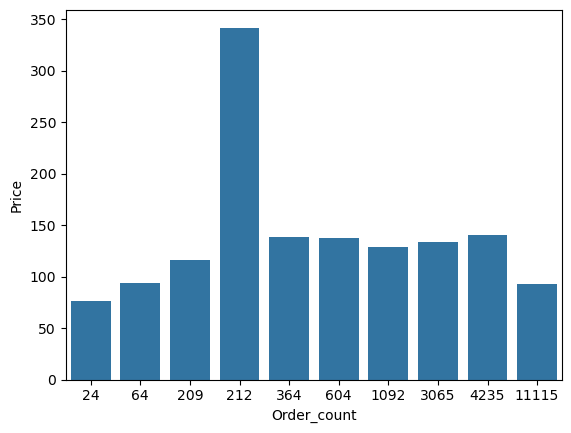

In [50]:
try:
    query = """ Select products.product_category,
    count(order_items.product_id) as order_count, round(avg(order_items.price)::integer,2) as avg_price
    from products join order_items
    on products.product_id = order_items.product_id
    group by products.product_category;
    """

    cur.execute(query)

    newd = cur.fetchall()
    print(newd)

except Exception as e:
    print("Error:- ", e)
    conn.rollback()

df = pd.DataFrame(newd, columns=["Category", "Order_count", "Price"])
df = df[:10]
df
sns.barplot(data=df , x = "Order_count", y = "Price")
plt.show()




In [18]:
import numpy as np

arr1 = df["Order_count"]
arr2 = df["Price"]

# np.corrcoef([arr1,arr2])  # Corralation exists between -1 to 1, where -1 means inversilly proportional value and 1 means directly proportional value.

# a = np.corrcoef([arr1,arr2])
# print("The correlation between price and number of times a product has been purchased is ", a[0][1])

df["Order_count"].corr(df["Price"])  # here the -ve value is close to 0 only we can say its a newtral value, so there is no relation between the columns.

-0.10643950249375149

# Calculate the total revenue generated by each seller, and rank them by revenue.

[('7c67e1448b00f6e969d365cea6b010ab', 507166.90999999945, 1), ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.0400000004, 2), ('4a3ca9315b744ce9f8e9374361493884', 301245.27000000014, 3), ('1f50f920176fa81dab994f9023523100', 290253.42000000033, 4), ('53243585a1d6dc2643021fd1853d8905', 284903.0800000002, 5), ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31999999995, 6), ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.1199999999, 7), ('955fee9216a65b617aa5c0531780ce60', 236322.30000000002, 8), ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.23000000007, 9), ('7e93a43ef30c4f03f38b393420bc753a', 185134.21000000002, 10), ('6560211a19b47992c3666cc44a7e94c0', 179657.7499999999, 11), ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80000000005, 12), ('25c5c91f63607446a97b143d2d535d31', 160534.73999999996, 13), ('a1043bafd471dff536d0c462352beb48', 154356.91000000006, 14), ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.34, 15), ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.03999999998, 16), ('620c87c171fb2a6dd6e8bb4dec9

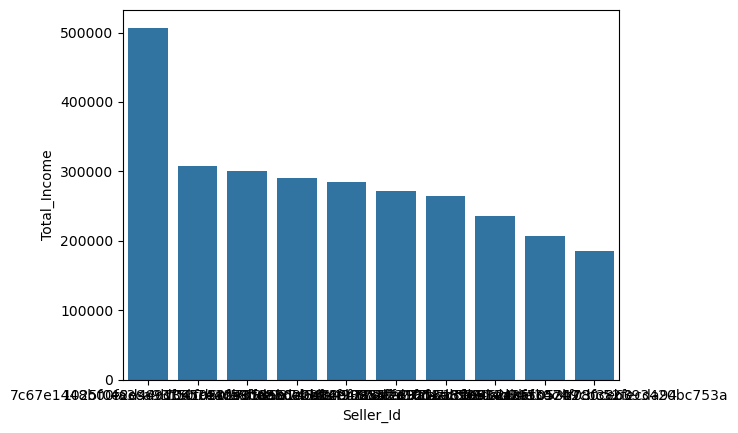

In [54]:
try:
    query = """ SELECT * , dense_rank() over(order by revenue desc) as Rank from (SELECT order_items.seller_id, sum(payments.payment_value) as revenue from order_items join payments
    ON order_items.order_id = payments.order_id
    group by order_items.seller_id) as A ;
    """

    cur.execute(query)

    newd = cur.fetchall()
    print(newd)

except Exception as e:
    print("Error:- ", e)
    conn.rollback()

df_newd = pd.DataFrame(newd, columns=["Seller_Id", "Total_Income", "Rank"])
df_newd = df_newd[:10]
print(df_newd)

sns.barplot(data = df_newd, x = "Seller_Id", y = "Total_Income")
# plt.xticks(rotation = 90)
plt.show()

# Calulate the moving average of order values for each customer over their order history.

In [ ]:
# Here we will be taking three years of moving average...

try:
    query = """ SELECT customer_id, order_purchase_timestamp, payment, 
    avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
    from
    (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
    from payments join orders
    on payments.order_id = orders.order_id) as a;
    """

    cur.execute(query)
    data = cur.fetchall()
    data

except Exception as e:
    print(e)
    conn.rollback()

df = pd.DataFrame(data, columns = ["Customer_id","Order_history","Price","Moving_Avg"])
df




,Customer_id,Order_history,Price,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# Calculate the cumulative sales per month for each year.

In [12]:
# Cumulative sales meaning by example:-
# 200     200
# 300     500
# 600     1100
# 800     1900
# 1000    2900
import pandas as pd
try:
    query =""" select years, months, payment, sum(payment)
    over(order by years, months) from
    (SELECT
        EXTRACT(YEAR FROM orders.order_purchase_timestamp::timestamp) AS years,
        EXTRACT(MONTH FROM orders.order_purchase_timestamp::timestamp) AS months,
        SUM(payments.payment_value) AS payment
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years, months
    ORDER BY years, months);

    """

    cur.execute(query)
    data = cur.fetchall()
    # print(data)

except Exception as e:
    print("Error: ", e)
    conn.rollback()

data_df = pd.DataFrame(data, columns=["Year","Month","Payment","Cummulative Sum"])
data_df.head(5)



,Year,Month,Payment,Cummulative Sum
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


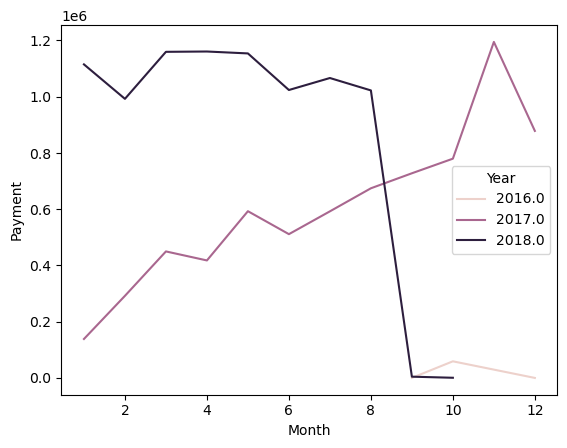

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = data_df, y = "Payment", x = "Month", hue="Year")
plt.show()

# Calculate the year-over-year growth of the total sales.

In [12]:
# year over year of the sales fromula:- [(Current Sales - Previous_year_sales)/ Previous Year Sales] * 100.

try:
    query = """ with a as (SELECT
        EXTRACT(YEAR FROM orders.order_purchase_timestamp::timestamp) AS years,
        SUM(payments.payment_value) AS payment
    FROM orders
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years
    ORDER BY years)
    
    select years,payment , lag(payment, 1) over(order by years) as Previous_year, ((payment - lag(payment, 1) over(order by years))/ lag(payment, 1) over(order by years))*100  from a"""
    cur.execute(query)
    data = cur.fetchall()
    print(data)

except Exception as e:
    print("Error:- ",e)
    conn.rollback()

df = pd.DataFrame(data, columns=["Years","Sales","Previous_year","Year_over_Year_%_growth"])
df

[(Decimal('2016'), 59362.34, None, None), (Decimal('2017'), 7249746.729999857, 59362.34, 12112.703761340705), (Decimal('2018'), 8699763.050000036, 7249746.729999857, 20.00092381158545)]


,Years,Sales,Previous_year,Year_over_Year_%_growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


# Calculate the retention rate of customers, defined as the percentage of customer who make another purchase within 6 months of their first purchase.

In [14]:
try:

    query = """ WITH a AS (
    SELECT customers.customer_id,
        MIN(orders.order_purchase_timestamp::timestamp) AS first_order
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),
b AS (
    SELECT a.customer_id,
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a
    JOIN orders ON orders.customer_id = a.customer_id
    WHERE orders.order_purchase_timestamp::timestamp > a.first_order
    AND orders.order_purchase_timestamp::timestamp < a.first_order + interval '6 months'
    GROUP BY a.customer_id
)
SELECT 
    100.0 * COUNT(DISTINCT a.customer_id) / NULLIF(COUNT(DISTINCT b.customer_id), 0)
FROM a
LEFT JOIN b ON a.customer_id = b.customer_id;


    """

    cur.execute(query)

    data = cur.fetchall()
    print(data)

except Exception as e:
    print("Error:- ", e)
    conn.rollback()


# The output of the above code will be none because according to our data we dont have the data where within 6 month another order is placed.

[(None,)]


# Identify the top 3 customers who spend the most money in each year.

In [28]:
try:

    query = """ Select years, customer_id, payment, d_rank
    from
    (SELECT EXTRACT(YEAR FROM 
    orders.order_purchase_timestamp::timestamp) years,
    orders.customer_id,
    sum(payments.payment_value) payment,
    dense_rank()
    over(partition by EXTRACT(YEAR FROM 
    orders.order_purchase_timestamp::timestamp)
    order by sum(payments.payment_value) desc) d_rank
    from orders join payments
    on payments.order_id = orders.order_id
    group by EXTRACT(YEAR FROM 
    orders.order_purchase_timestamp::timestamp),
    orders.customer_id) as a
    where d_rank <= 3;
    """

    cur.execute(query)

    data = cur.fetchall()
    print(data)

except Exception as e:
    print("Error:- ", e)
    conn.rollback()

df = pd.DataFrame(data, columns = ['Year','Customer_id','Payment','Rank'])
df


[(Decimal('2016'), 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.55, 1), (Decimal('2016'), '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.74, 2), (Decimal('2016'), '4a06381959b6670756de02e07b83815f', 1227.78, 3), (Decimal('2017'), '1617b1357756262bfa56ab541c47bc16', 13664.08, 1), (Decimal('2017'), 'c6e2731c5b391845f6800c97401a43a9', 6929.31, 2), (Decimal('2017'), '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66, 3), (Decimal('2018'), 'ec5b2ba62e574342386871631fafd3fc', 7274.88, 1), (Decimal('2018'), 'f48d464a0baaea338cb25f816991ab1f', 6922.21, 2), (Decimal('2018'), 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.44, 3)]


,Year,Customer_id,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


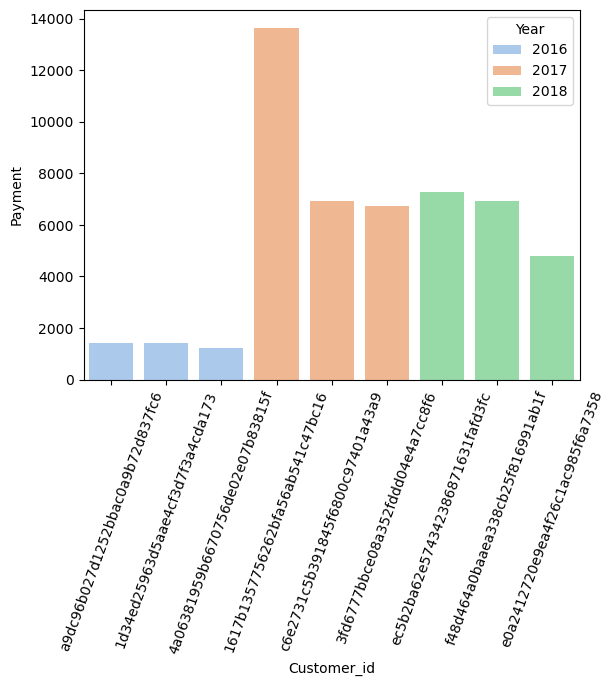

In [37]:
# Highest lowest value every year
sns.barplot(x = 'Customer_id', y = "Payment", data = df, hue = "Year", palette='pastel')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
hello every this is for checking the github

